In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\aknar'

In [3]:
variable=pd.read_csv(r"C:\Users\aknar\Type2-Diabetes-prediction\Dataset\diabetes.csv")
variable

,PREGNANCIES,GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,INSULIN,BMI,DIABETES PEDIGREE FUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Describe data
variable.describe()

,PREGNANCIES,GLUCOSE,BLOOD PRESSURE,SKIN THICKNESS,INSULIN,BMI,DIABETES PEDIGREE FUNCTION,AGE,OUTCOME
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#information of dataset
variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
PREGNANCIES                   768 non-null int64
GLUCOSE                       768 non-null int64
BLOOD PRESSURE                768 non-null int64
SKIN THICKNESS                768 non-null int64
INSULIN                       768 non-null int64
BMI                           768 non-null float64
DIABETES PEDIGREE FUNCTION    768 non-null float64
AGE                           768 non-null int64
OUTCOME                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Check for all null values
variable.isnull().values.any()

False

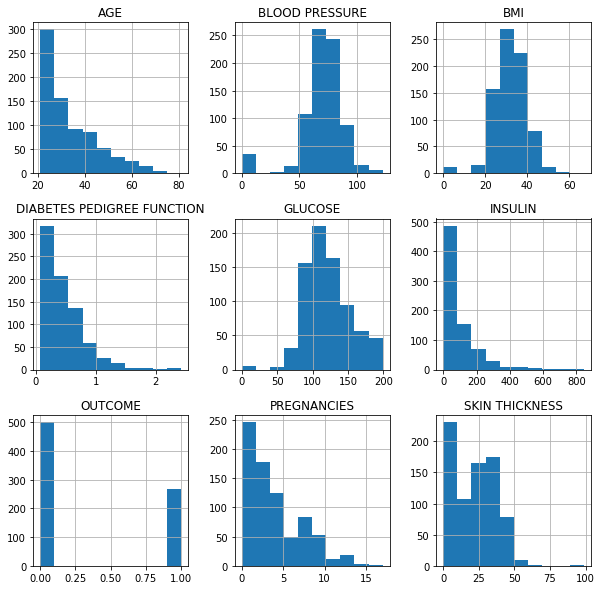

In [8]:
#histogram
variable.hist(bins=10, figsize=(10,10))
plt.show()

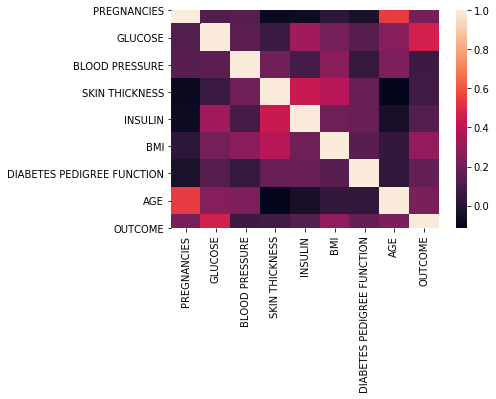

In [9]:
#Correlation
sns.heatmap(variable.corr())
# we see that skin thickness, age, insulin and pregnancies are fully independent on each other
#age and pregnanacies have negative correlation

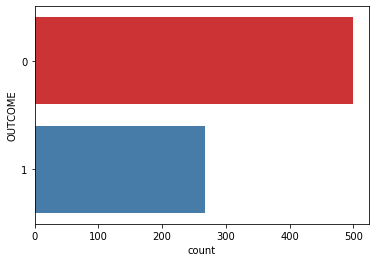

In [10]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=variable['OUTCOME'],palette='Set1')

C:\Users\aknar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aknar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


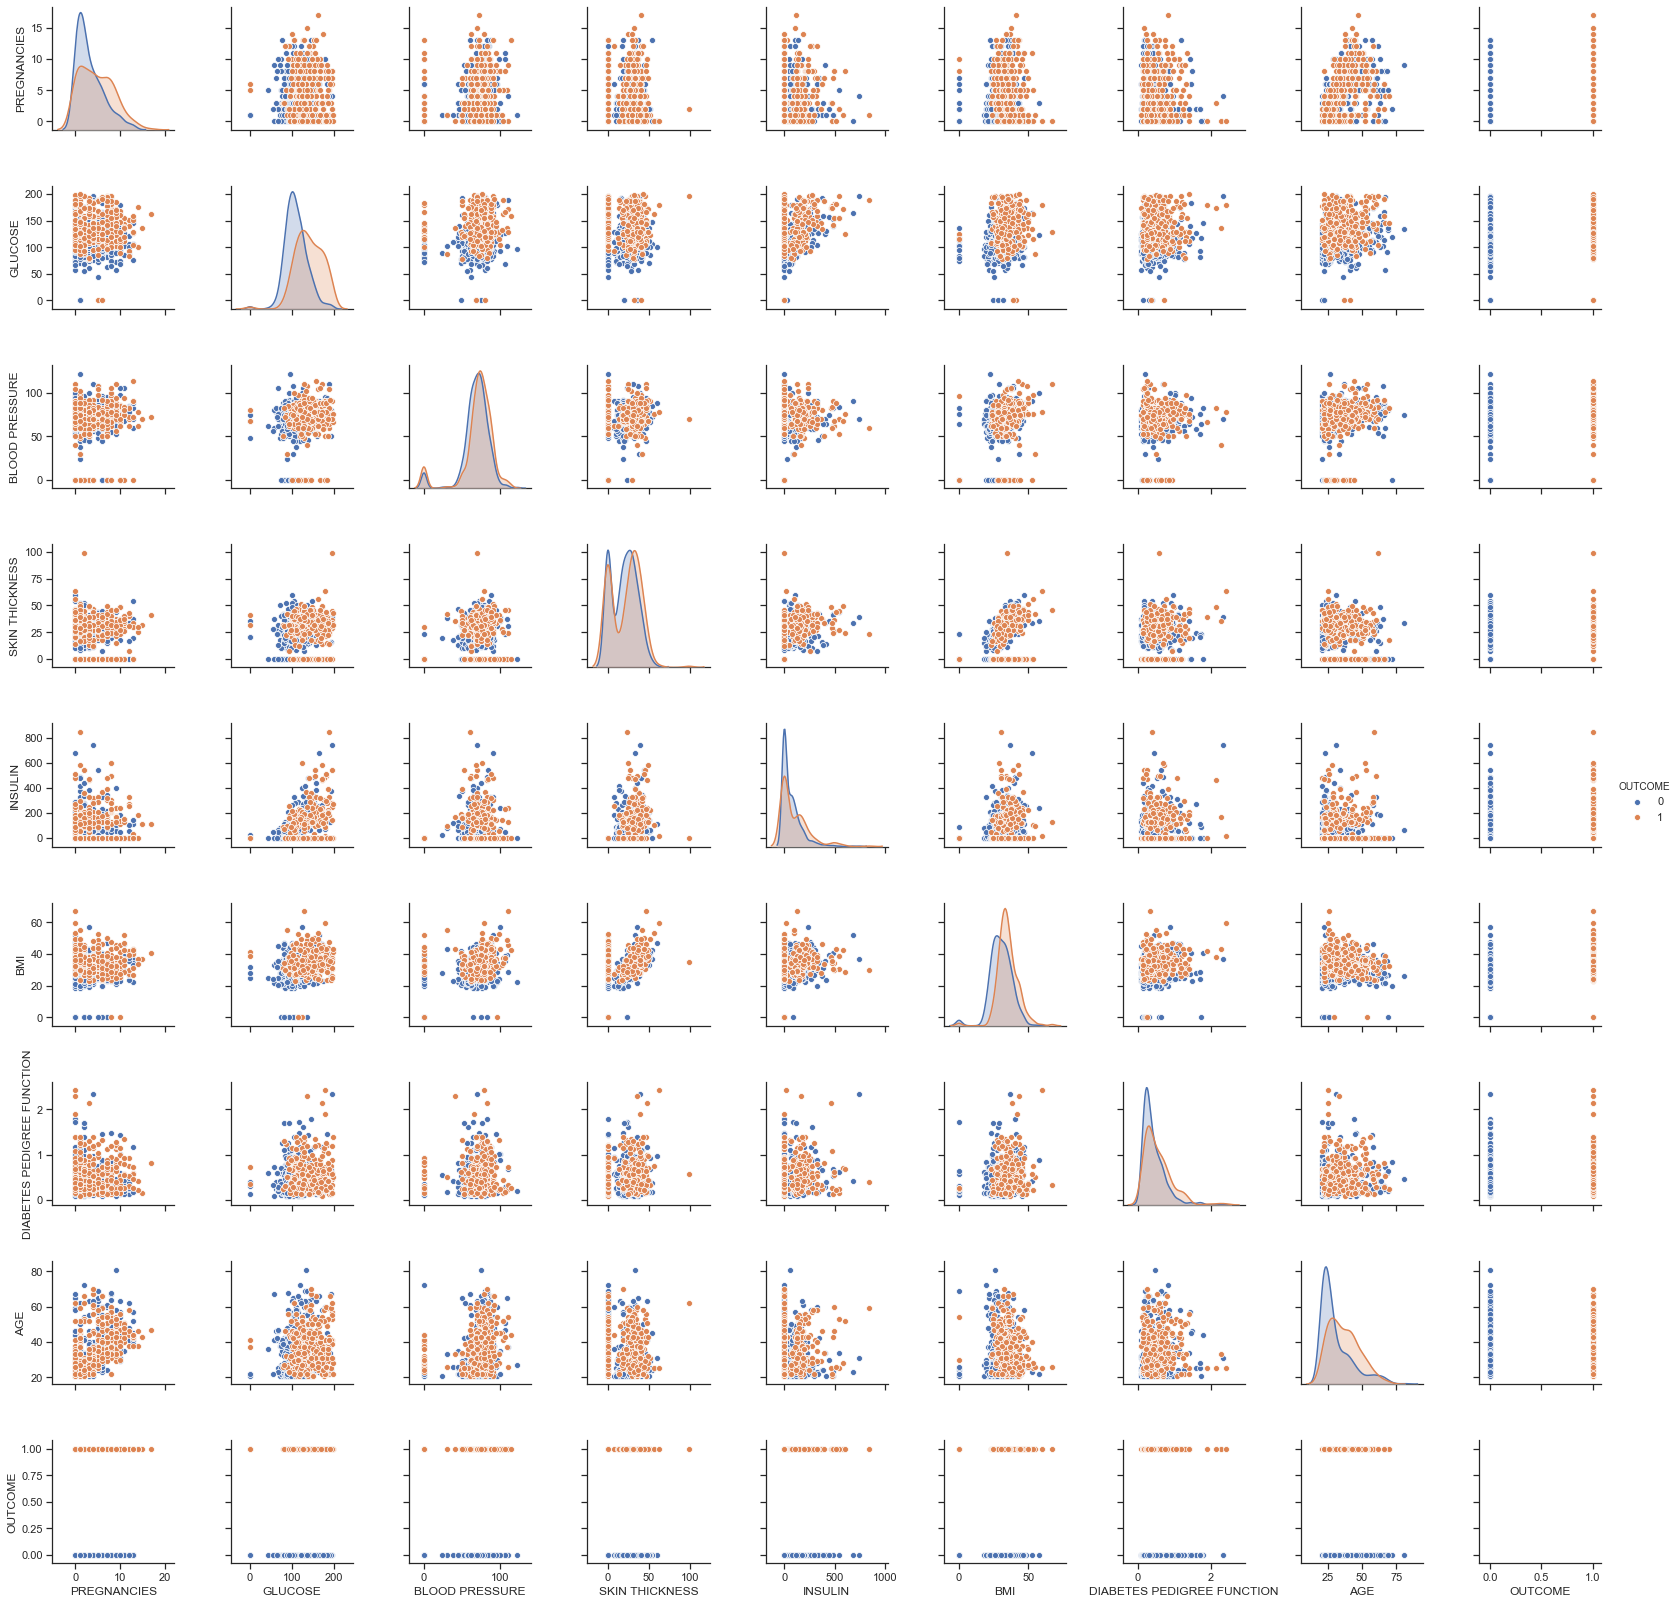

In [11]:
sns.set(style="ticks")
sns.pairplot(variable, hue="OUTCOME")

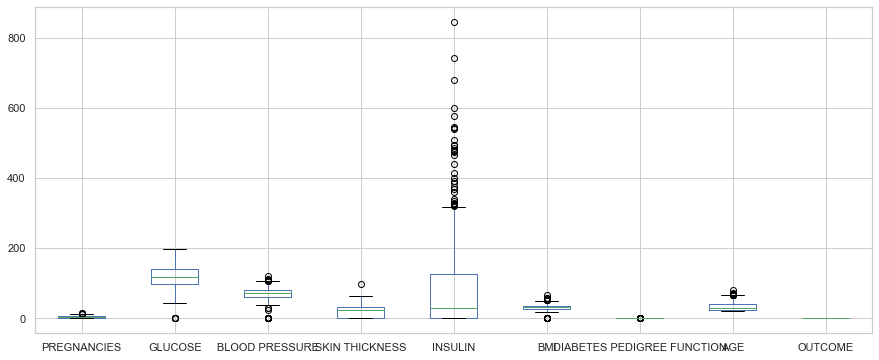

In [14]:
#box plot for outlier visualisation
sns.set(style="whitegrid")
variable.boxplot(figsize=(15,6))

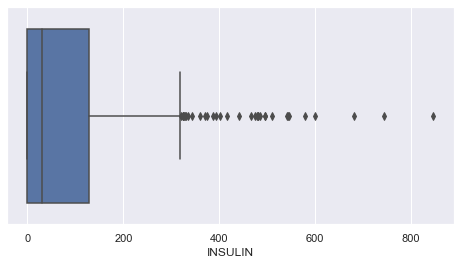

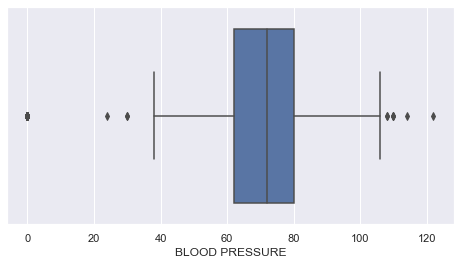

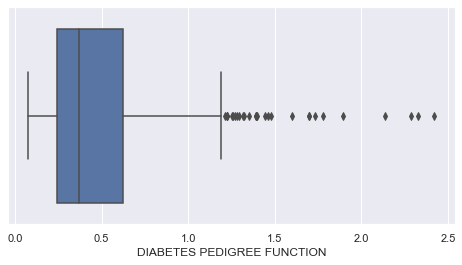

In [15]:
#box plot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=variable['INSULIN'])
plt.show()
sns.boxplot(x=variable['BLOOD PRESSURE'])
plt.show()
sns.boxplot(x=variable['DIABETES PEDIGREE FUNCTION'])
plt.show()

In [18]:
#outlier remove
Q1=variable.quantile(0.25)
Q3=variable.quantile(0.75)
IQR=Q3-Q1
print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 PREGNANCIES                    1.00000
GLUCOSE                       99.00000
BLOOD PRESSURE                62.00000
SKIN THICKNESS                 0.00000
INSULIN                        0.00000
BMI                           27.30000
DIABETES PEDIGREE FUNCTION     0.24375
AGE                           24.00000
OUTCOME                        0.00000
Name: 0.25, dtype: float64

---Q3--- 
 PREGNANCIES                     6.00000
GLUCOSE                       140.25000
BLOOD PRESSURE                 80.00000
SKIN THICKNESS                 32.00000
INSULIN                       127.25000
BMI                            36.60000
DIABETES PEDIGREE FUNCTION      0.62625
AGE                            41.00000
OUTCOME                         1.00000
Name: 0.75, dtype: float64

---IQR---
 PREGNANCIES                     5.0000
GLUCOSE                        41.2500
BLOOD PRESSURE                 18.0000
SKIN THICKNESS                 32.0000
INSULIN                       127.2500
BMI  

In [19]:
#outlier remove
variable_out = variable[~((variable < (Q1 - 1.5 * IQR)) |(variable > (Q3 + 1.5 * IQR))).any(axis=1)]
variable.shape,variable_out.shape
#more than 80 records deleted

((768, 9), (639, 9))

C:\Users\aknar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aknar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


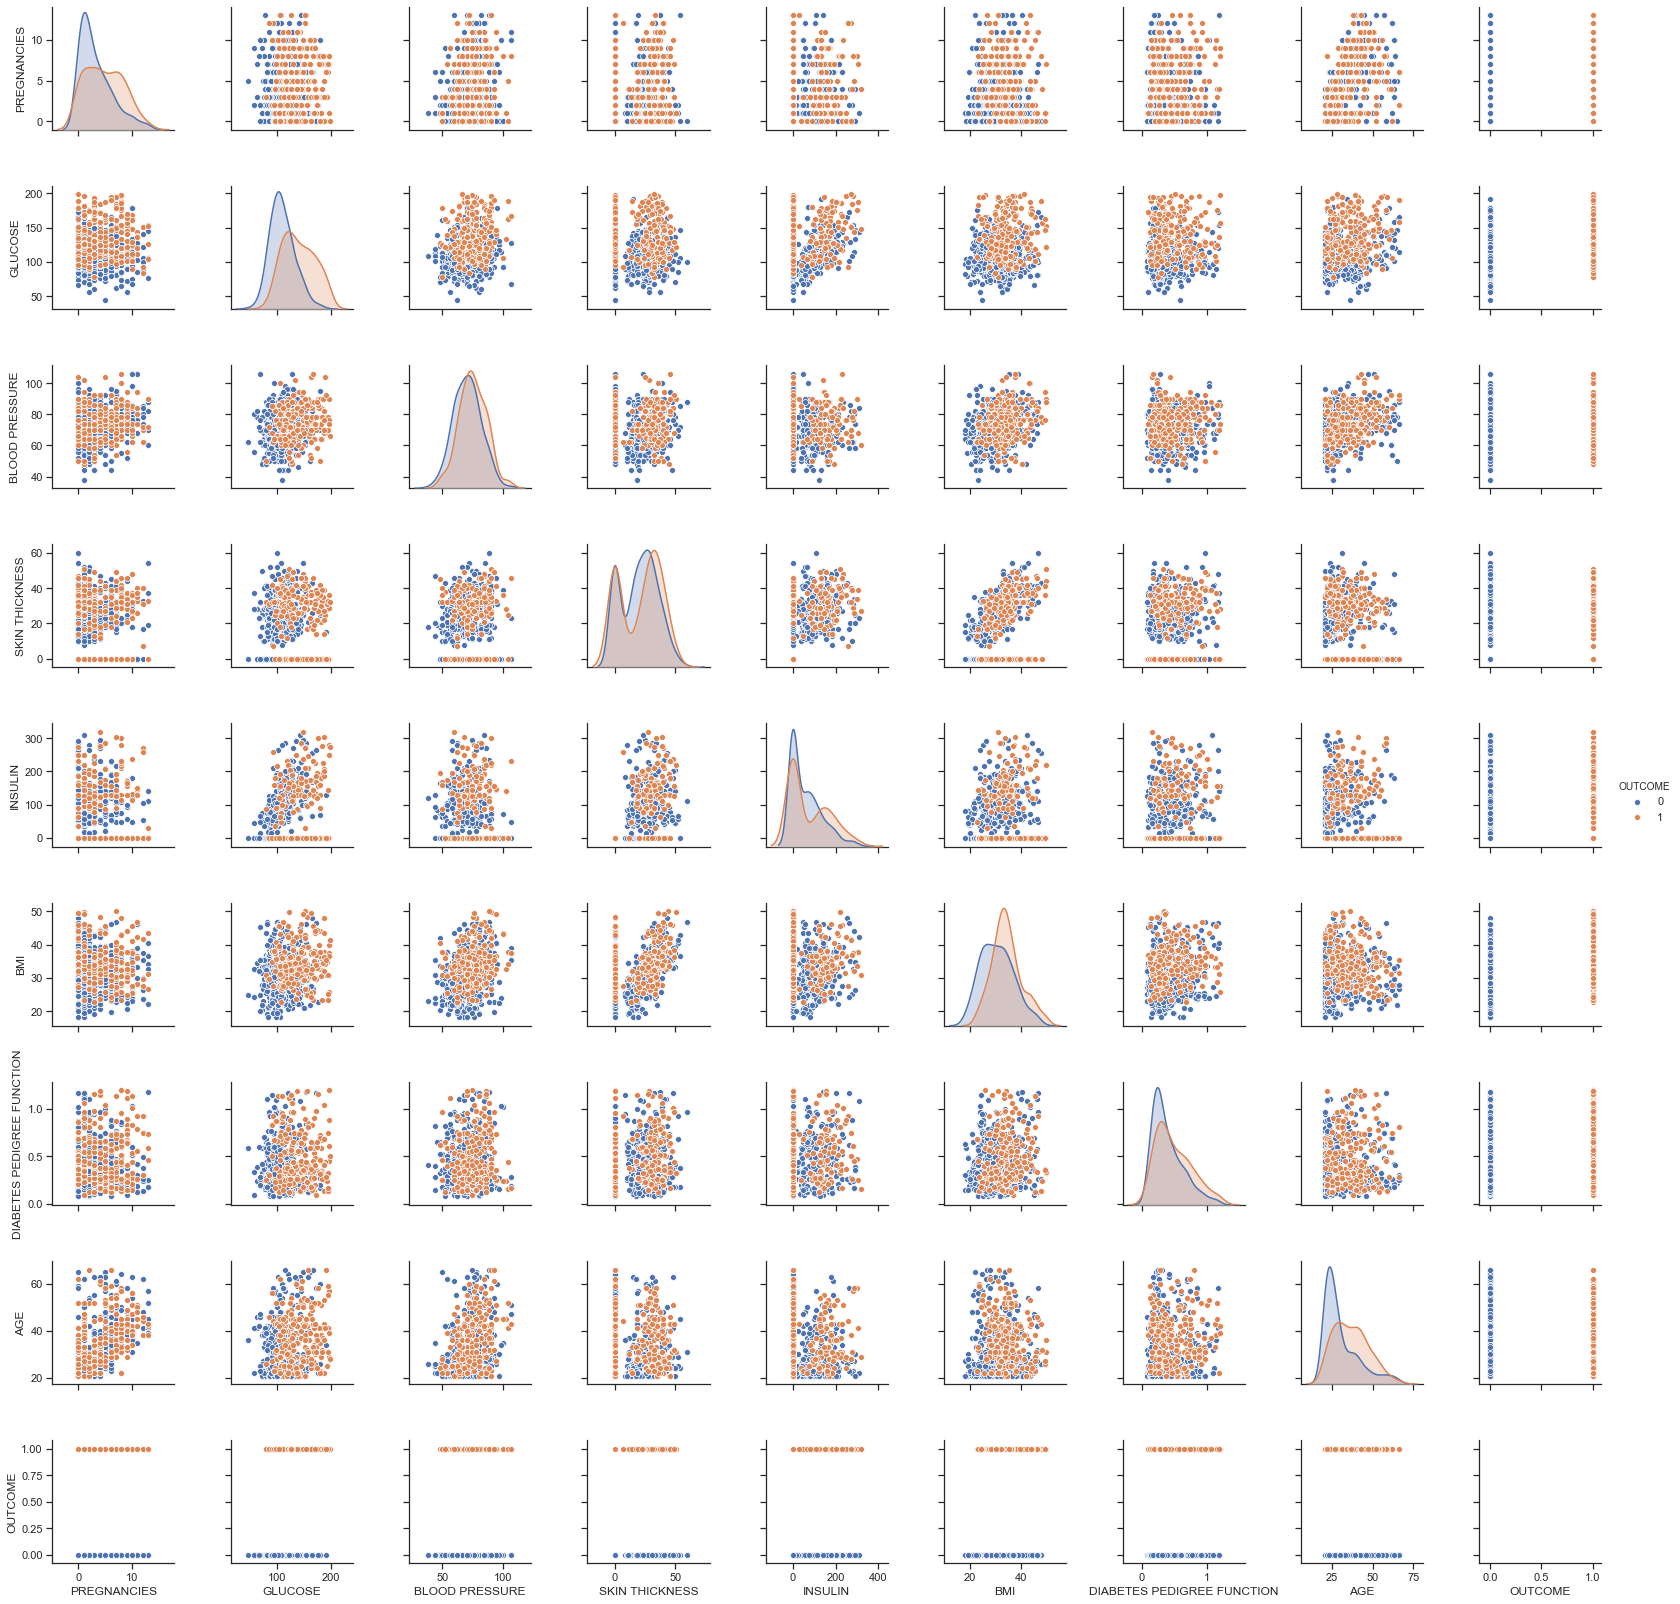

In [20]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(variable_out, hue="OUTCOME")
plt.show()

In [21]:
#lets extract features and targets
X=variable_out.drop(columns=['OUTCOME'])
y=variable_out['OUTCOME']

In [22]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [23]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))